# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Новый раздел

In [ ]:
#parser




from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

def get_data_hl(t_1, t_2, t_3, t_4, t5, url : str):
    #print('https://public.psp.cz/sqw/'+url)
    page_response = requests.get('https://public.psp.cz/sqw/' + url)
    content = BeautifulSoup(page_response.content, 'html.parser', from_encoding="windows-1250")
    people = content.find_all(attrs={'class':'results'})
    content = content.find_all('h2', attrs={'class':'section-title center'})
    array = []
    for i in range(1,len(content)-1):
        #i = i.find('span')
        pop = content[i].find('span')
        array.append(pop.get_text().split()[0])
    array_people = []
    for i in people:
        pop = i.find_all('li')
        arr = []
        for j in pop:
            arr.append(j.get_text())
        array_people.append(arr)
    k = 0
    while k < len(array_people):
        if len(array_people[k]) == 0:
            del array_people[k]
        else:
            k += 1
    array_pd = []
    for i in range(0, len(array_people)):
        for j in array_people[i]:
            j = j.replace('\xa0', ' ')
            array_pd.append(pd.Series({'Název': t_1,
                        'Schůze': t_2,
                        'Č. hl.':t5,
                        'Datum': t_3,
                        'Výsledek': t_4,
                        'Klub': array[i],
                        'Jmeno' : j.split(' ', 1)[1],
                        'Hlas' : j.split(' ', 1)[0]}))
    df = pd.DataFrame(array_pd)
    return df




def get_data(url : str):
    a = pd.read_html(url,encoding="windows-1250")
    b = a[0]
    #print(b)
    b = b[['Název', 'Schůze', 'Datum', 'Výsledek', 'Č. hl.']]
    page_response = requests.get(url)
    content = BeautifulSoup(page_response.content, 'html.parser', from_encoding="windows-1250")
    content = content.find(id = 'main-content')
    content = content.find_all('a')
    array = []
    for i in content:
        if len(i.get_text()) < 7:
            array.append(i.get('href'))
    df = get_data_hl(b['Název'].iloc[0], b['Schůze'].iloc[0], b['Datum'].iloc[0], b['Výsledek'].iloc[0], b['Č. hl.'].iloc[0], array[0])
    for i in range(1,len(b)):
        df = pd.concat([get_data_hl(b['Název'].iloc[i], b['Schůze'].iloc[i], b['Datum'].iloc[i], b['Výsledek'].iloc[i], b['Č. hl.'].iloc[0], array[i]),df])
    #print(df.info())
    return df


def parser():
    url_st, url_end = 'https://public.psp.cz/sqw/phlasa.sqw?o=8&s=', '&pg='
    df = get_data(url_st + str(1) + url_end + str(1))
    print('table 1  is ok')
    for i in range(2, 63):
        if  i != 10 and i!=21:

            j = 1 
            while True:
                print('schuze ', str(j), '  is ok')
                page_response = requests.get(url_st + str(i) + url_end + str(j))
                content = BeautifulSoup(page_response.content, 'html.parser', from_encoding="windows-1250")
                content = content.find(id = 'main-content')
                content = content.find_all('table')
                #print(len(content), i, j)
                if len(content) > 0:
                    pop = get_data(url_st + str(i) + url_end + str(j))
                    df = pd.concat([pop, df])
                else:
                    break
                j += 1
        print('table ', str(i), '  is ok')
    file_name ='file1.csv'
    df.to_csv(file_name)
    print(df)
    
    return 



parser()

In [2]:
### odtud už je to Vaše
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
dir = os.path.abspath(os.curdir)
dir
df = pd.read_csv('file1.csv')
df = df[['Schůze', 'Název', 'Výsledek', 'Jmeno', 'Klub', 'Hlas', 'Datum', 'Č. hl.']]
%matplotlib inline
df


,Schůze,Název,Výsledek,Jmeno,Klub,Hlas,Datum,Č. hl.
0,62,Sml. o vydávání mezi ČR a Argentinskou republi...,Přijato,Věra Adámková,ANO,A,22. 10. 2020 12:47,121
1,62,Sml. o vydávání mezi ČR a Argentinskou republi...,Přijato,Andrej Babiš,ANO,0,22. 10. 2020 12:47,121
2,62,Sml. o vydávání mezi ČR a Argentinskou republi...,Přijato,Andrea Babišová,ANO,M,22. 10. 2020 12:47,121
3,62,Sml. o vydávání mezi ČR a Argentinskou republi...,Přijato,Ondřej Babka,ANO,A,22. 10. 2020 12:47,121
4,62,Sml. o vydávání mezi ČR a Argentinskou republi...,Přijato,Margita Balaštíková,ANO,0,22. 10. 2020 12:47,121
...,...,...,...,...,...,...,...,...
893795,1,Inf. o ustavení volební komise PS a volbě členů,Přijato (zmatečné),Petr Gazdík,STAN,A,20. 11. 2017 13:53,1
893796,1,Inf. o ustavení volební komise PS a volbě členů,Přijato (zmatečné),Věra Kovářová,STAN,A,20. 11. 2017 13:53,1
893797,1,Inf. o ustavení volební komise PS a volbě členů,Přijato (zmatečné),Jana Krutáková,STAN,A,20. 11. 2017 13:53,1
893798,1,Inf. o ustavení volební komise PS a volbě členů,Přijato (zmatečné),Martin Půta,STAN,A,20. 11. 2017 13:53,1


In [ ]:
#tady
#df = df.sort_values(by = ['Schùze'])

1.dohazka klubu


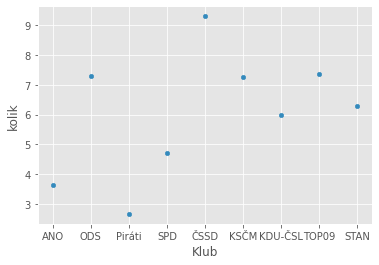

In [21]:
##Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
df_1 = df[['Klub', 'Hlas']]
df_klub = df['Klub'].drop_duplicates()
arr = []
for i in range(0,len(df_klub)-1):
  hlas_neni = df_1.where(df['Klub'] == df_klub.iloc[i]).dropna().where(df['Hlas'] == '0').dropna().count()[0]
  hlas_all = df_1.where(df['Klub'] == df_klub.iloc[i]).dropna().count()[0]
  arr.append(pd.Series({'Klub': df_klub.iloc[i], 'kolik': (hlas_neni/((hlas_all)/100))}))

ans = pd.DataFrame(arr)
print("1.dohazka klubu")
ans.plot.scatter(x = 'Klub', y = 'kolik')


#====================================================================================#

  






2.dohazka lidi  ANO
2.dohazka lidi  ODS
2.dohazka lidi  Piráti
2.dohazka lidi  SPD
2.dohazka lidi  ČSSD
2.dohazka lidi  KSČM
2.dohazka lidi  KDU-ČSL
2.dohazka lidi  TOP09
2.dohazka lidi  STAN


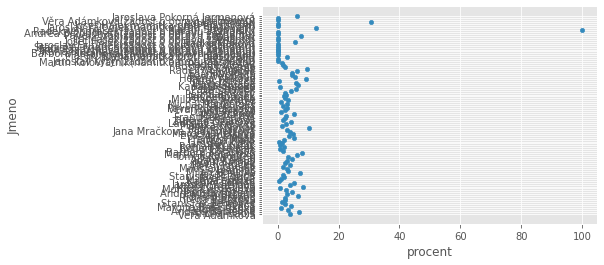

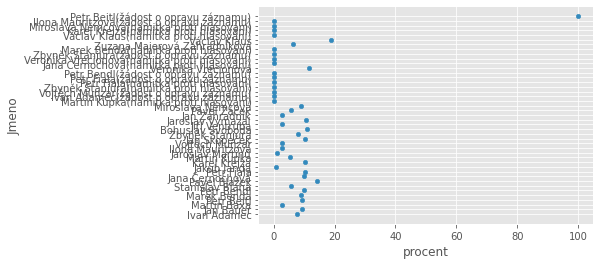

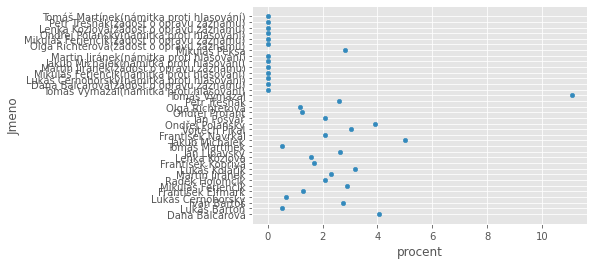

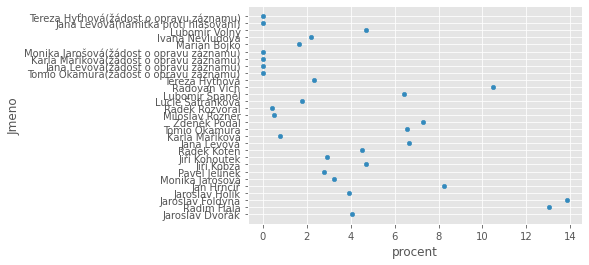

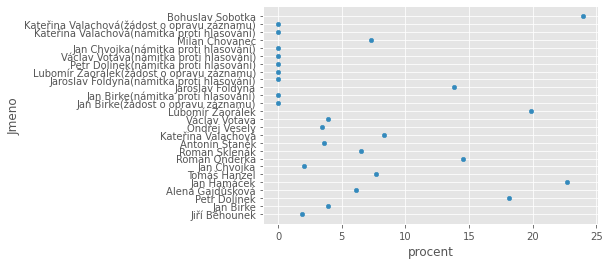

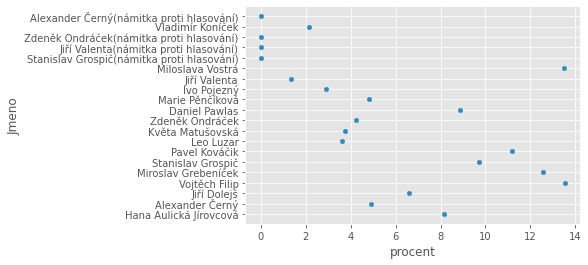

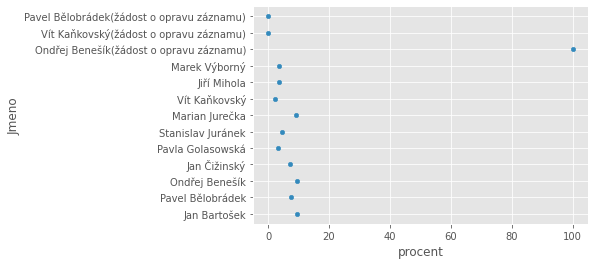

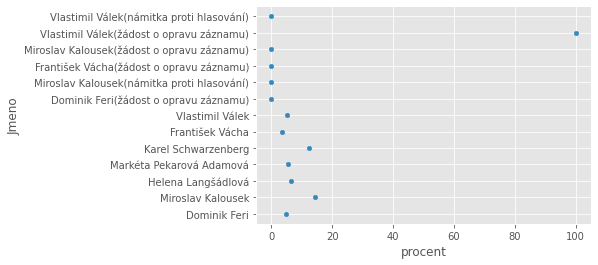

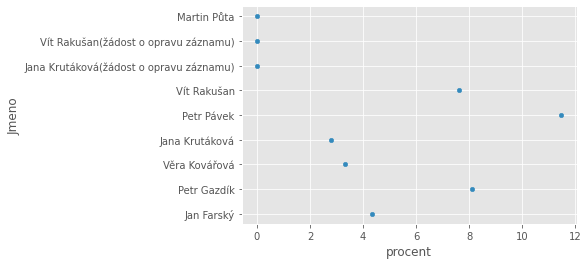

In [17]:
df_1 = df[['Jmeno', 'Hlas', 'Klub']]
for j in range(0, len(df_klub)-1):
  df_clovek = df[['Jmeno', 'Klub']].drop_duplicates().dropna().where(df['Klub'] == df_klub.iloc[j]).drop_duplicates().dropna()
  df_clovek = df_clovek['Jmeno']
  arr = []
  for i in range(0,len(df_clovek)):
    hlas_neni = df_1.where(df['Jmeno'] == df_clovek.iloc[i]).dropna().where(df['Hlas'] == '0').dropna().count()[0]
    hlas_all = df_1.where(df['Jmeno'] == df_clovek.iloc[i]).dropna().count()[0]
    arr.append(pd.Series({'Jmeno': df_clovek.iloc[i], 'procent': (hlas_neni/((hlas_all)/100))}))

  ans = pd.DataFrame(arr)
  print("2.dohazka lidi ", df_klub.iloc[j])
  ans.plot.scatter(x = 'procent', y = 'Jmeno')
  #ans.plot(x = 'procent', y = 'Jmeno')
  #ans.figure(x = 'procent', y = 'Jmeno', figsize=(15,6))


In [26]:
df_clovek = df['Jmeno'].drop_duplicates()
arr = []
for i in range(0,len(df_clovek)):
  hlas_neni = df_1.where(df['Jmeno'] == df_clovek.iloc[i]).dropna().where(df['Hlas'] == '0').dropna().count()[0]
  hlas_all = df_1.where(df['Jmeno'] == df_clovek.iloc[i]).dropna().count()[0]
  arr.append(pd.Series({'Jmeno': df_clovek.iloc[i], 'procent': (hlas_neni/((hlas_all)/100))}))

ans = pd.DataFrame(arr)





ans_1 = ans.where(ans['procent'] == ans['procent'].max()).dropna()
print("nejmensi dohazka")
ans_1

nejmensi dohazka


,Jmeno,procent
241,Ondřej Benešík(žádost o opravu záznamu),100.0
269,Radek Vondráček(žádost o opravu záznamu),100.0
278,Vlastimil Válek(žádost o opravu záznamu),100.0
291,Petr Beitl(žádost o opravu záznamu),100.0


In [ ]:
#Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).
#predpokladame ze hlasuji stejne kdyz maji vetsi nez 90 za nebo proti%
df_date = df['Datum'].drop_duplicates()
df_klub = df['Klub'].drop_duplicates()
arr_ans = []
for i in range(0,len(df_klub)-1):
  arr_ans.append([df_klub.iloc[i], 0])
for i in range(0,len(df_date)):
  for j in range(0,len(df_klub)-1):
    df_hlasy = df.where(df['Datum'] == df_date.iloc[i]).dropna().where(df['Klub'] == df_klub.iloc[j]).dropna()
    df_hlasy = df_hlasy['Hlas']
    hlas_ano = df_hlasy.where(df['Hlas'] == 'A').dropna().count()
    hlas_ne = df_hlasy.where(df['Hlas'] == 'N').dropna().count()
    if hlas_ano > hlas_ne:
      if (hlas_ano/((hlas_ne+hlas_ano)/100)) >= 90:
        arr_ans[j][1] += 1
    else:
      if (hlas_ne/((hlas_ne+hlas_ano)/100)) >= 90:
        arr_ans[j][1] += 1


Jak jsou poslanci jednotlivých stran jednotní v hlasování


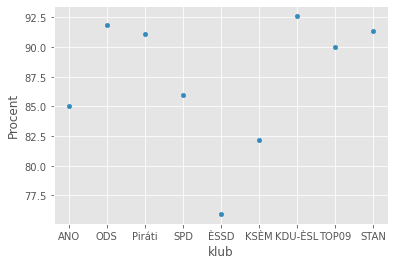

In [ ]:
arr = []
all_shuze = len(df_date)
for i in arr_ans:
  arr.append(pd.Series({'klub': i[0], 'Procent' : (i[1]/(all_shuze/100))}))

df_ans3 = pd.DataFrame(arr)
print("Jak jsou poslanci jednotlivých stran jednotní v hlasování")
df_ans3.plot.scatter(x = 'klub', y = 'Procent')

In [34]:
#Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
#tady predpokladame ze kdyz klub A a B maji proti vetsi nez 50 % tak hlasovali stejne
df_date = df['Datum'].drop_duplicates()
df_klub = df['Klub'].drop_duplicates()
k1, k2, k3, k4, k5, k6, k7, k8, k9 = df_klub.iloc[0], df_klub.iloc[1], df_klub.iloc[2], df_klub.iloc[3], df_klub.iloc[4], df_klub.iloc[5],df_klub.iloc[6], df_klub.iloc[7], df_klub.iloc[8]    
arr_k = [k1, k2, k3, k4, k5, k6, k7, k8, k9]
arr = []
for i in range(0, len(df_date)):
  arr_hl = []
  for j in arr_k:
    #print(j)
    df_hlasy = df.where(df['Datum'] == df_date.iloc[i]).dropna().where(df['Klub'] == j).dropna()
    df_hlasy = df_hlasy['Hlas']
    hlas_ano = df_hlasy.where(df['Hlas'] == 'A').dropna().count()
    hlas_ne = df_hlasy.where(df['Hlas'] == 'N').dropna().count()
    if hlas_ano > hlas_ne:
      arr_hl.append(1)
    else:
      arr_hl.append(0)
  arr.append(pd.Series({arr_k[0]: arr_hl[0], arr_k[1]: arr_hl[1], arr_k[2]: arr_hl[2], arr_k[3]: arr_hl[3], arr_k[4]: arr_hl[4], arr_k[5]: arr_hl[5], arr_k[6]: arr_hl[6], arr_k[7]: arr_hl[7], arr_k[8]: arr_hl[8]}))
    #print(arr_hl)
    #print(arr_k)
df_ans4 = pd.DataFrame(arr)
df_ans4


,ANO,ODS,Piráti,SPD,ČSSD,KSČM,KDU-ČSL,TOP09,STAN
0,1,1,1,1,1,1,1,1,1


Jak často spolu klub Ano hlasuje stejne s ostatnimi klubami


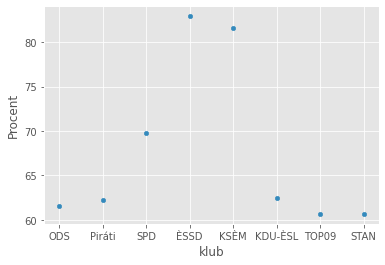

In [ ]:

#Jak často spolu klub Ano hlasuje stejne s ostatnimi klubami

df_klub = df['Klub'].drop_duplicates()
for pop in range(0,len(df_klub)-1)
  arr_klub = []
  arr_ans = []
  for i in range(1,len(df_klub)-1):
    if df_klub.iloc[i] != df_klub.iloc[pop]:
      arr_ans.append([df_klub.iloc[i], 0])
  for j in range(1,len(df_klub)-1):
    if df_klub.iloc[j] != df_klub.iloc[pop]:
      arr_klub.append(df_klub.iloc[j])
  for i in range(0, len(df_ans4)):
    for j in range(0, len(arr_klub)):
      if df_ans4[df_klub.iloc[pop]].iloc[i] == df_ans4[arr_klub[j]].iloc[i]:
        arr_ans[j][1] += 1
  all_shuze = len(df_date)
  for i in arr_ans:
    i[1] = i[1]/(all_shuze/100)
  arr = []
  for i in arr_ans:
    arr.append(pd.Series({'klub': i[0], 'Procent' : i[1]}))
  ans = pd.DataFrame(arr)
  print("Jak často spolu klub Ano hlasuje stejne s ostatnimi klubami")
  ans.plot.scatter(x = 'klub', y = 'Procent')

In [37]:
#Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
print("tady graf nema smysl")
df_lidi = df['Jmeno'].drop_duplicates()
for i in range(0, len(df_lidi)):
  b = df[['Jmeno','Klub','Schůze']].sort_values(by = 'Schůze')
  b = b[['Jmeno','Klub']]
  b = b[['Jmeno','Klub']].where(df['Jmeno'] == df_lidi.iloc[i]).dropna().drop_duplicates().set_index('Jmeno')
  if len(b) > 1:
    print(b)

tady graf nema smysl
                     Klub
Jmeno                    
Jaroslav Foldyna     ČSSD
Jaroslav Foldyna      SPD
Jaroslav Foldyna  Nezařaz
                 Klub
Jmeno                
Marian Bojko      SPD
Marian Bojko  Nezařaz
                   Klub
Jmeno                  
Tereza Hyťhová      SPD
Tereza Hyťhová  Nezařaz
                 Klub
Jmeno                
Václav Klaus      ODS
Václav Klaus  Nezařaz
                                 Klub
Jmeno                                
Zuzana Majerová Zahradníková      ODS
Zuzana Majerová Zahradníková  Nezařaz
                    Klub
Jmeno                   
Ivana Nevludová      SPD
Ivana Nevludová  Nezařaz
                  Klub
Jmeno                 
Lubomír Volný      SPD
Lubomír Volný  Nezařaz


In [28]:
df.shape

(893800, 8)

In [ ]:
df_1 = df[['Klub', 'Hlas']]
df_klub = df['Klub'].drop_duplicates()
arr = []
for i in range(0,len(df_klub)-1):
  hlas_neni = df_1.where(df['Schůze'] == 1).dropna().where(df['Klub'] == df_klub.iloc[i]).dropna().where(df['Hlas'] == '0').dropna().count()[0]
  hlas_all = df_1.where(df['Schůze'] == 1).dropna().where(df['Klub'] == df_klub.iloc[i]).dropna().count()[0]
  arr.append(pd.Series({'Klub': df_klub.iloc[i], 'kolik': (hlas_neni/((hlas_all)/100))}))
arr1 = []
for i in range(0,len(df_klub)-1):
  hlas_neni = df_1.where(df['Schůze'] == 28).dropna().where(df['Klub'] == df_klub.iloc[i]).dropna().where(df['Hlas'] == '0').dropna().count()[0]
  hlas_all = df_1.where(df['Schůze'] == 28).dropna().where(df['Klub'] == df_klub.iloc[i]).dropna().count()[0]
  arr1.append(pd.Series({'Klub': df_klub.iloc[i], 'kolik': (hlas_neni/((hlas_all)/100))}))


#Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
#jak se zmenil dohazka mezi 1 shuze a 28
import numpy as np
res = []
ans['kolik'].iloc[0]
for i in range(0, len(ans)):
    if ans['kolik'].iloc[i] == 0 and ans1['kolik'].iloc[i] == 0:
        res.append(pd.Series({'Klub': ans['Klub'].iloc[i], 'kolik': 0}))
    elif ans['kolik'].iloc[i] != 0 and ans1['kolik'].iloc[i] == 0:
        res.append(pd.Series({'Klub': ans['Klub'].iloc[i], 'kolik': np.nan}))
    elif ans['kolik'].iloc[i] == 0 and ans1['kolik'].iloc[i] != 0:
        res.append(pd.Series({'Klub': ans['Klub'].iloc[i], 'kolik': np.nan}))
    elif ans['kolik'].iloc[i] > ans1['kolik'].iloc[i]:
        #print(ans1['kolik'].iloc[i]/((ans['kolik'].iloc[i])/100))
        res.append(pd.Series({'Klub': ans['Klub'].iloc[i], 'kolik': ans1['kolik'].iloc[i]/((ans['kolik'].iloc[i])/100)}))
    elif ans['kolik'].iloc[i] < ans1['kolik'].iloc[i]:
        #print(-ans1['kolik'].iloc[i]/((ans['kolik'].iloc[i])/100))
        res.append(pd.Series({'Klub': ans['Klub'].iloc[i], 'kolik': -ans1['kolik'].iloc[i]/((ans['kolik'].iloc[i])/100)}))
df_res = pd.DataFrame(res)
df_res.plot.scatter(x = 'Klub', y = 'kolik')

In [41]:
#Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
#predpokladame ze dulezita hlasovani to je kdy kluby hlasovali od 60%/40% do 40%/60%  
df_date = df['Datum'].drop_duplicates()
for i in range(0, len(df_ans4)):
  if df_ans4.iloc[i].sum()>=4 and df_ans4.iloc[i].sum()<=5:
    print(df_date.iloc[i])